# Predictive model - School shootings in the US

#### Block 2 - Fundamentals of Machine Learning
M Data-driven Design <br>
Evi Franken </br><br>
1786080</br>

______________________________________________________________________________________________________________________

# 1. Introduction

#### 1.1 Context 
At April 20, 1999 a school shooting and attempted bombing occured at a High School in Columbine, Colorado. It was the deadliest high school shooting in the US until 2018. Since then 'Columbine' has become a byword for school shootings. This heartbreaking massacre made a big impact on the whole world, but most importantly on the children who were exposed to the school shootings. More than 240,000 students have experienced gun violence at school since Columbine (Analysis | More than 240,000 Students Have Experienced Gun Violence at School since Columbine, 2018). Unfortunately, the federal government in the United States does not track school shootings. Therefore journalists from The Washington Post have spend a year determining how many children have ben effected and documented it into 1 dataframe. 

#### 1.2 The research question
<i>"Given the relationship with the shooter, the school enrollment, whether the school had the resource of an officer and the shooting type how well can the casualties be predicted?"</i>

#### 1.3 Practical relevance 
The dataset seems rich and contains many types of information. However there are a lot of variables that contain a lot of NaN's and there aren't a lot of entries (this is caused by the federal government that doesnt track these school shootings). It's not a lot, and it makes it a bit harder for machine learning, as I don't have a lot of data to choose from in order to make the best prediction. However I think its a very interesting (and a little grim as well) topic, so this will motivate me. Thus, I'll try to make the best out of it.

______________________________________________________________________________________________________________________

# 2. The data-set


### 2.1 The acquired the data

I found the dataset while searching through Google. This showed me a research report by the Washington Post (https://www.washingtonpost.com/graphics/2018/local/school-shootings-database/). This report contained some shocking stats and as a result of looking into this I found out they had a corresponding dataset. I quickly analyzed it on Github, and decided dat due to the shocking/interesting topic, the accompanied layout information and the rich amount of columns I would start my Machine learning with this dataset.

The original and raw dataset has: 
<ul>
  <li><i>237 entries</i></li>
  <li><i>50 columns (variables)</i></li>
</ul>

______________________________________________________________________________________________________________________

<b>First the limitations of the dataset</b>


There are variables that are not of interest because of their wide and unique categorical ratio: e.g. school state, school id, county and ulocale etc.

Then there are some variables that for me seemed a little bit too grim: including race/ethnicity of the schools. Eventhough the variables would be very helpful, I don't feel comfortable by using these.

And finally the datasest contains a lot of variables with too many NaN's.

______________________________________________________________________________________________________________________

### 2.2 Data cleaning

In [41]:
import pandas as pd #libarary for data manipulation and analysis
import numpy as np
import seaborn as sns #The plotting library
import matplotlib.pyplot as plt #Matplotlib for setting the labels in the Seaborn graphs
from sklearn.model_selection import train_test_split #We need this to split the data

#sets the limit of displaying rows to none
pd.set_option("display.max_rows", None, "display.max_columns", None)

There are a lot of columns in this dataset that contain many NaNs. It therefore wouldn't work to drop the NaN immediately. I first need to check for variables (around 10) that have little to no NaN's. Then I subset the dataframe and leave out the NaN's.

First I have a quick look at all variables, by using <i>df.head( )</i>.

In [42]:
df = pd.read_csv('school_shootings.csv')
df.head(15)

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783,16.0,112.0,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,583.0,0.0,0.0,0.0,NaN,NaN,0,.22-caliber handgun,NaN,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,"1,369",0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189,136.0,28.0,15.0,1.0,NaN,NaN,1,".22-caliber rifle, .357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209,2736.0,27.0,170.0,5.0,NaN,NaN,1,RG .25-caliber handgun,purchased from friend,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,"1,116",0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,755.0,287.0,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0
5,6,350069000240,Deming Middle School,3500690.0,Deming Public Schools,11/19/1999,1999-2000,1999,12:45 PM,Friday,Deming,New Mexico,public,753,1,0,1,accidental or targeted,12.0,m,h,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,6.0,583.0,2.0,2.0,NaN,NaN,0,.22-caliber Colt revolver,home,32.261547,-107.762986,44.0,6,7,502.0,Luna County,35,35029,33.0
6,7,401197000559,Fort Gibson Middle School,4011970.0,Fort Gibson,12/6/1999,1999-2000,1999,7:45 AM,Monday,Fort Gibson,Oklahoma,public,407,0,5,5,indiscriminate,13.0,m,ai,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239,3.0,12.0,0.0,153.0,NaN,NaN,0,Taurus 9mm handgun,father,35.795556,-95.241921,25.4,6,8,146.0,Muskogee County,40,40101,32.0
7,8,120153001590,Ridgewood High School,1201530.0,Pasco,1/19/2000,1999-2000,2000,3:00 PM,Wednesday,New Port Richey,Florida,public,1852,1,0,1,accidental,16.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697,28.0,96.0,26.0,5.0,NaN,NaN,1,.22-caliber Magnum handgun,stolen,28.273253,-82.687231,85.0,9,12,654.0,Pasco County,12,12101,21.0
8,9,062460009581,Alicia Reyes Elementary School,624600.0,Merced City Elementary,1/26/2000,1999-2000,2000,8:34 AM,Wednesday,Merced,California,public,734,0,0,0,targeted,13.0,m,NaN,none,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,40.0,389.0,222.0,1.0,NaN,NaN,0,.22-caliber revolver,NaN,37.286387,-120.494808,36.0,KG,5,643.0,Merced County,6,6047,13.0
9,10,170993000748,Duke Ellington Elementary School,1709930.0,City of Chicago School District 299,2/14/2000,1999-2000,2000,NaN,Monday,Chicago,Illinois,public,736,0,1,1,accidental,11.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,Na

______________________________________________________________________________________________________________________

##### Selecting my variables

I I selected 8 variables that I thought would have little to no NaN's, and that were not too large of a ratio (e.g. state & city).

These are: 
<ul>
  <li><i>day of week</i></li>
  <li><i>casualties</i></li>
  <li><i>school_type</i></li>
  <li><i>enrollment</i></li>
  <li><i>shooting_type</i></li>
  <li><i>gender_shooter1</i></li>
  <li><i>resource_officer</i></li>
</ul>

I think that 'shooter_relationship1' is also an interesting variable, as it can help me with spinning it into a positive assignment: schools and police departments can learn from this by surveillance and detecting problems in school. But is does have more NaN's compared to some other variables. So let's look into this variable and then decide.

______________________________________________________________________________________________________________________

##### Deciding to leave out or include the column 'shooter relationship'

I want to check the amount of entries when including this variable and by dropping the NaN's. Then by showing the info of the dataframe I can make a decision.

In [43]:
test = df[['day_of_week', 'casualties', 'school_type', 'enrollment', 'shooting_type', 'gender_shooter1', 'resource_officer']]
test = test.dropna() #leaving out all rows with NaNs
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 236
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   day_of_week       222 non-null    object
 1   casualties        222 non-null    int64 
 2   school_type       222 non-null    object
 3   enrollment        222 non-null    object
 4   shooting_type     222 non-null    object
 5   gender_shooter1   222 non-null    object
 6   resource_officer  222 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.9+ KB


So it shows me the the dataframe contains of 222 entries.

In [44]:
df2 = df[['day_of_week', 'casualties', 'school_type', 'enrollment', 'shooting_type', 'gender_shooter1', 'shooter_relationship1', 'resource_officer']]
df2 = df2.dropna() #leaving out all rows with NaNs
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 236
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   day_of_week            185 non-null    object
 1   casualties             185 non-null    int64 
 2   school_type            185 non-null    object
 3   enrollment             185 non-null    object
 4   shooting_type          185 non-null    object
 5   gender_shooter1        185 non-null    object
 6   shooter_relationship1  185 non-null    object
 7   resource_officer       185 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 13.0+ KB


Including the shooter_relationship, I have 185 entries. After consulation with other students, <i>I decided to keep the variable 'shooter_relationship'</i>. It gives me less rows, but 185 is just enough and I think this variable is interesting enough. The next step would be to have a look at the data frame and see what columns and values need cleaning.

______________________________________________________________________________________________________________________

##### What variables need cleaning?

In [45]:
df2.head(5)

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter1,shooter_relationship1,resource_officer
0,Tuesday,34,public,1965,indiscriminate,m,student,1
1,Thursday,1,public,588,targeted,m,former student (expelled),0
2,Thursday,6,public,"1,369",indiscriminate,m,student,1
3,Monday,1,public,3147,targeted,m,student,1
5,Friday,1,public,753,accidental or targeted,m,student,0


To make the predictions easier, I will classify the column casualties as a 1 / 0 (yes/no) value. For the same reason I will make dummies out of the variables shooting_type and shooter_relationship. Dummy variables are numeric, and represent the sub-categories of a categorical variable in the dataset. The main benefit of using dummies is because dummies are simple.

______________________________________________________________________________________________________________________

##### 1. Changing casualties in to a yes no variable (0/1)

In [46]:
df2['casualties_number']= df2['casualties'] # adding another column so I will always have the number in here as well
df2.loc[df2['casualties'] > 0, 'casualties'] = 1 #adding a 1 for casualties and a 0 for no casualties
df2.head(15)

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter1,shooter_relationship1,resource_officer,casualties_number
0,Tuesday,1,public,1965,indiscriminate,m,student,1,34
1,Thursday,1,public,588,targeted,m,former student (expelled),0,1
2,Thursday,1,public,"1,369",indiscriminate,m,student,1,6
3,Monday,1,public,3147,targeted,m,student,1,1
5,Friday,1,public,753,accidental or targeted,m,student,0,1
6,Monday,1,public,407,indiscriminate,m,student,0,5
7,Wednesday,1,public,1852,accidental,m,student,1,1
8,Wednesday,0,public,734,targeted,m,none,0,0
9,Monday,1,public,736,accidental,m,student,0,1
11,Thursday,0,public,711,targeted,m,former boyfriend of student,0,0


______________________________________________________________________________________________________________________

##### 2. Cleaning up the variable shooter_relationship

To convert the shooter_relationship into dummies, I first have to take a look at all the values to determine which variables I want to include and/or combine.

In [47]:
df2["shooter_relationship1"].value_counts()

student                                                      121
none                                                           8
former student                                                 7
parent of student                                              6
former student (expelled)                                      5
resource officer                                               5
student                                                        4
spouse of teacher                                              3
teacher                                                        2
former boyfriend of student's mother                           1
police officer                                                 1
not a student but often hung around the school                 1
SWAT officer                                                   1
janitor                                                        1
fired teacher                                                  1
student in summer school 

The first thing I notice is that there are two values of student. Let's have a look at the difference by showing their unique values.

In [48]:
df2.shooter_relationship1.unique()

array(['student', 'former student (expelled)', 'none',
       'former boyfriend of student', 'parent of student',
       'spouse of teacher', 'student in summer school',
       'not a student but often hung around the school',
       'student (suspended)', 'multiple officers', 'security guard',
       'former student', 'father of football player',
       'dating mother of student', 'SWAT officer', 'resource officer',
       'none; worked in community', 'boyfriend of student', 'non-student',
       'ex-boyfriend of student', 'janitor', 'police officer',
       'student at neighboring school, rode bus with some victims',
       'fired teacher', 'suspended student from different campus',
       'student ', 'father of student', 'student at rival school',
       'friend of student', 'brother of student', 'teacher',
       "former boyfriend of student's mother", 'substitute teacher'],
      dtype=object)

The difference is a space behind the word. So let's see if we can combine these two columns.

Also the result of displaying all values for the variable shooter_relationship, shows me there are a too many specific values. And a lot of values that only consist of 1 count. Most values can be combined into one column. So student in summerschool can be merged into the value of just a student. Thus, I want to simplify this by using broader categories such as: parents, student and teachers. I will create a column of remaining values to combine the more random variables. This way I will only have a few columns which is better when I convert them into dummies.

In [49]:
df2["shooter_relationship1"].replace({"former student (expelled)": "student",
                                     "former student (suspended)": "student",
                                     "former student":"student",
                                     "former boyfriend of student": "boyfriend",
                                     "boyfriend of student":"boyfriend",
                                     "parent of student":"parent",
                                     "student in summer school":"remaining",
                                     "not a student but often hung around the school":"remaining",
                                     "none":"remaining",
                                     "multiple officers":"remaining",
                                     "security guard":"officer",
                                     "multiple officers":"officer",
                                     "father of football player":"parent",
                                     "dating mother of student":"parent",
                                     "SWAT officer":"officer",
                                     "none; worked in community":"remaining",
                                     "resource officer":"officer",
                                     "spouse of teacher":"teacher",
                                     "non-student":"remaining",
                                     "ex-boyfriend of student":"boyfriend",
                                     "police officer":"officer",
                                     "janitor":"remaining",
                                     "student at neighboring school, rode bus with some victims":"remaining",
                                     "fired teacher":"teacher",
                                     "suspended student from different campus":"remaining",
                                     "student at rival school":"remaining",
                                     "father of student":"parent",
                                     "friend of student":"remaining",
                                     "brother of student":"remaining",
                                     "former boyfriend of student's mother":"parent",
                                     "substitute teacher":"teacher",
                                     "student ":"student",
                                     "student (suspended)":"student"
                                    }, inplace=True)

I changed a lot of values, so let's quickly check if it looks allright.

In [50]:
df2["shooter_relationship1"].value_counts()

student      138
remaining     18
parent        10
officer        9
teacher        7
boyfriend      3
Name: shooter_relationship1, dtype: int64

All ready.

______________________________________________________________________________________________________________________

##### 3. Cleaning up the variable shooting_type

The same for the variable of shooting_type. To convert the shooting_type into dummies, I first have to take a look at all the values to determine if I need to clean up some values.

In [51]:
df2["shooting_type"].value_counts()

targeted                       107
indiscriminate                  39
accidental                      22
targeted and indiscriminate      5
public suicide                   4
unclear                          3
accidental or targeted           2
hostage suicide                  2
public suicide (attempted)       1
Name: shooting_type, dtype: int64

There are a few values I want to combine such as public suicide and hostage suicide. But other then that, the variable is ready to convert into dummies.

In [52]:
df2["shooting_type"].replace({"targeted and indiscriminate": "unclear",
                                      "public suicide":"suicide",
                                      "public suicide (attempted)":"suicide",
                                      "accidental or targeted":"unclear",
                                      "hostage suicide":"suicide"
                                    }, inplace=True)

______________________________________________________________________________________________________________________

##### 4. Dummies of variables shooter_relationship and shooting_type

Now Let's make dummies out of these variables.

In [53]:
dummies = pd.get_dummies(df2[['shooter_relationship1', 'shooting_type']]) #selecting the variables
df3 = df2.merge(dummies, left_index= True, right_index= True)
df3.info()
df3.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 236
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   day_of_week                      185 non-null    object
 1   casualties                       185 non-null    int64 
 2   school_type                      185 non-null    object
 3   enrollment                       185 non-null    object
 4   shooting_type                    185 non-null    object
 5   gender_shooter1                  185 non-null    object
 6   shooter_relationship1            185 non-null    object
 7   resource_officer                 185 non-null    int64 
 8   casualties_number                185 non-null    int64 
 9   shooter_relationship1_boyfriend  185 non-null    uint8 
 10  shooter_relationship1_officer    185 non-null    uint8 
 11  shooter_relationship1_parent     185 non-null    uint8 
 12  shooter_relationship1_remaining  185

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter1,shooter_relationship1,resource_officer,casualties_number,shooter_relationship1_boyfriend,shooter_relationship1_officer,shooter_relationship1_parent,shooter_relationship1_remaining,shooter_relationship1_student,shooter_relationship1_teacher,shooting_type_accidental,shooting_type_indiscriminate,shooting_type_suicide,shooting_type_targeted,shooting_type_unclear
0,Tuesday,1,public,1965,indiscriminate,m,student,1,34,0,0,0,0,1,0,0,1,0,0,0
1,Thursday,1,public,588,targeted,m,student,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Thursday,1,public,"1,369",indiscriminate,m,student,1,6,0,0,0,0,1,0,0,1,0,0,0


I quickly rename the columns, just for the convenience of working with the variable names.

In [54]:
df3 = df3.rename(columns={'gender_shooter1': 'gender_shooter', 
                          'shooter_relationship1_boyfriend': 'S_R_boyfriend',
                          'shooter_relationship1_officer': 'S_R_officer',
                          'shooter_relationship1_parent': 'S_R_parent',
                          'shooter_relationship1_remaining': 'S_R_remaining',
                          'shooter_relationship1_student': 'S_R_student',
                          'shooter_relationship1_teacher': 'S_R_teacher',
                          'shooting_type_accidental':'S_type_accidental',
                          'shooting_type_indiscriminate':'S_type_indiscriminate',
                          'shooting_type_suicide':'S_type_suicide',
                          'shooting_type_targeted':'S_type_targeted',
                          'shooting_type_unclear':'S_type_unclear',
                          })

df3.head(5)

,day_of_week,casualties,school_type,enrollment,shooting_type,gender_shooter,shooter_relationship1,resource_officer,casualties_number,S_R_boyfriend,S_R_officer,S_R_parent,S_R_remaining,S_R_student,S_R_teacher,S_type_accidental,S_type_indiscriminate,S_type_suicide,S_type_targeted,S_type_unclear
0,Tuesday,1,public,1965,indiscriminate,m,student,1,34,0,0,0,0,1,0,0,1,0,0,0
1,Thursday,1,public,588,targeted,m,student,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Thursday,1,public,"1,369",indiscriminate,m,student,1,6,0,0,0,0,1,0,0,1,0,0,0
3,Monday,1,public,3147,targeted,m,student,1,1,0,0,0,0,1,0,0,0,0,1,0
5,Friday,1,public,753,unclear,m,student,0,1,0,0,0,0,1,0,0,0,0,0,1


______________________________________________________________________________________________________________________

##### 5. Converting the variable 'enrollment'

The variable enrollment uses comma's for values over 1000. This was causing trouble. Therefore I changed the the type from object into a int64, so I can easily use this for my visualizations and predictions. Converting it directly into an integer was not possible. Therefore I first changed it into a string and after that I dropped the comma's and changed the type into an integer.



In [55]:
# converting the variable enrollment to a string
df['enrollment'] = df['enrollment'].astype(str)

# replacing the comma and converting to an integer
df3['enrollment'] = df3['enrollment'].str.replace(',', '').astype(int)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 236
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   day_of_week            185 non-null    object
 1   casualties             185 non-null    int64 
 2   school_type            185 non-null    object
 3   enrollment             185 non-null    int64 
 4   shooting_type          185 non-null    object
 5   gender_shooter         185 non-null    object
 6   shooter_relationship1  185 non-null    object
 7   resource_officer       185 non-null    int64 
 8   casualties_number      185 non-null    int64 
 9   S_R_boyfriend          185 non-null    uint8 
 10  S_R_officer            185 non-null    uint8 
 11  S_R_parent             185 non-null    uint8 
 12  S_R_remaining          185 non-null    uint8 
 13  S_R_student            185 non-null    uint8 
 14  S_R_teacher            185 non-null    uint8 
 15  S_type_accidental      

The data is now ready for further analysis!

______________________________________________________________________________________________________________________

### 2.2 Data visualizations

##### 1. Choosing my variables for prediction (by correlations)

First I'll start with finding the most strongly correlating variables so I know which variables can be of use and which don't. I want to predict the casualties, so by sorting the values on casualties I can read the matrix in a more convenient way.

In [56]:
corr = df3.corr().sort_values('casualties', ascending=False)
corr

,casualties,enrollment,resource_officer,casualties_number,S_R_boyfriend,S_R_officer,S_R_parent,S_R_remaining,S_R_student,S_R_teacher,S_type_accidental,S_type_indiscriminate,S_type_suicide,S_type_targeted,S_type_unclear
casualties,1.000000,0.067670,0.153110,0.257155,-0.023381,0.074252,0.029682,-0.101687,0.001696,0.050654,0.214401,-0.155008,-0.339805,0.130344,-0.025230
casualties_number,0.257155,0.100965,0.155631,1.000000,-0.038544,-0.052011,-0.060016,-0.025565,0.097609,-0.027708,-0.052840,0.386390,-0.087383,-0.248632,-0.004627
S_type_accidental,0.214401,0.005138,-0.133293,-0.052840,-0.047167,-0.005455,-0.013972,-0.120613,0.060961,0.102186,1.000000,-0.189877,-0.072855,-0.430291,-0.087821
resource_officer,0.153110,0.224595,1.000000,0.155631,-0.018847,0.171509,-0.100009,-0.048194,0.051948,-0.106046,-0.133293,-0.021885,-0.163747,0.147628,0.046057
S_type_targeted,0.130344,-0.040636,0.147628,-0.248632,0.109618,0.142192,0.155689,0.058697,-0.221680,-0.002791,-0.430291,-0.605342,-0.232265,1.000000,-0.279979
S_R_officer,0.074252,0.024452,0.171509,-0.052011,-0.029033,1.000000,-0.054056,-0.074241,-0.387486,-0.044844,-0.005455,-0.116875,-0.044844,0.142192,-0.054056
enrollment,0.067670,1.000000,0.224595,0.100965,-0.043126,0.024452,-0.221766,0.029764,0.135433,-0.091433,0.005138,-0.004694,-0.014221,-0.040636,0.101854
S_R_teacher,0.050654,-0.091433,-0.106046,-0.027708,-0.025460,-0.044844,-0.047405,-0.065105,-0.339805,1.000000,0.102186,-0.033038,-0.039326,-0.002791,-0.047405
S_R_parent,0.029682,-0.221766,-0.100009,-0.060016,-0.030691,-0.054056,1.000000,-0.078480,-0.409611,-0.047405,-0.013972,-0.123548,-0.047405,0.155689,-0.057143
S_R_student,0.001696,0.135433,0.051948,0.097609,-0.219996,-0.387486,-0.409611,-0.562560,1.000000,-0.339805,0.060961,0.118971,0.115731,-0.221680,0.084594


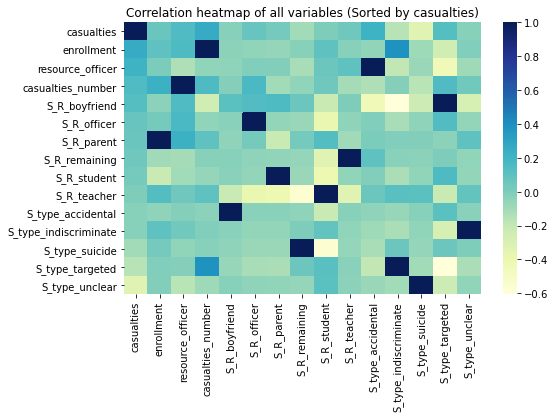

In [57]:
# Let's plot the correlation into a heatmap
# I used: annot = True, to also display the corr values. But for now, just the colors will do.
plt.figure(figsize=(8,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu') #the last two arguments set the column names
plt.title("Correlation heatmap of all variables (Sorted by casualties)")
plt.show()

<b>The most interesting correlations with casualties are:</b>
<ul>
  <li><i>enrollment</i></li>
  <li><i>resource_officer</i></li>
  <li><i>S_R_boyfriend</i></li>
  <li><i>S_R_officer</i></li>
  <li><i>S_type_accidental</i></li>

</ul>
The remaining values have very similar correlations to eachother but have a very low correlation with casualties.


<b>Strong correlations between other values (so not direct in relation to casualties):</b>
<ul>
  <li><i>S_R_parent + enrollment</i></li>
  <li><i>Casualties_number + S_type_targeted</i></li>  
  <li><i>Casualties_number + resource_officer</i></li>
  <li><i>Casualties_number + enrollment</i></li>
  <li><i>S_R_boyfriend + S_type_accidental</i></li>
  <li><i>S_R_officer + S_R_officer</i></li>
  <li><i>S_R_student + S_R_parent</i></li>
  <li><i>S_R_remaining + S_type_suicide</i></li>
  <li><i>S_R_teacher + S_R_student</i></li>
  <li><i>S_R_officer + S_type_accidental</i></li>
  <li><i>enrollment + S_type_indiscriminate</i></li>
  <li><i>S_type_targeted + S_type_indiscriminate</i></li>
  <li><i>S_type_suicide + S_type_unclear</i></li>
  <li><i>S_type_indiscriminate + S_type_unclear</i></li>
  <li><i>S_R_boyfriend + S_type_targeted</i></li>
</ul>

______________________________________________________________________________________________________________________

##### 2. Visualizing the resource of an officer at school

Let's start with visualizing some of the variables that had a high correlation with casualties. 

Text(0, 0.5, 'The resource of an officer at school')

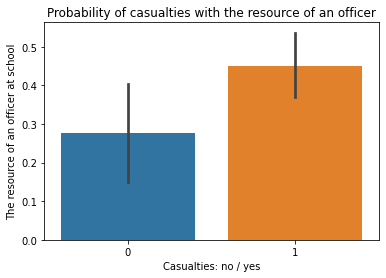

In [58]:
sns.barplot(x="casualties", y="resource_officer", data=df3)
plt.title("Probability of casualties with the resource of an officer")
plt.xlabel('Casualties: no / yes')
plt.ylabel('The resource of an officer at school')

Here you can see on the y-axis that the schools with an officer, had more casualties compared to schools without a resource officer. Ofcourse this also can have something to do with the enrollment, as school with more students might need more surveillance in order to facilitate and secure everything. So let's check that out, by visualizing the casualties and enrollment.

______________________________________________________________________________________________________________________

##### 3. Visualizing values of the school enrollment

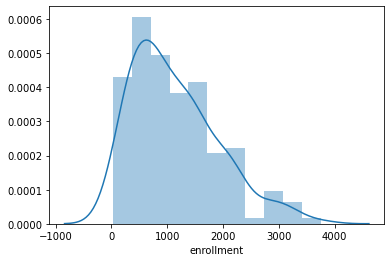

In [59]:
sns.distplot(df3['enrollment'])

This graph shows a right skewed distribution for the enrollment of schools. This result shows that the mean is greater than the median. The reason for this right-skewed data is most probably a few large values that drive the mean upward. 

______________________________________________________________________________________________________________________

##### 4. Visualizing the density of casualties for school enrollment

Text(0, 0.5, 'Enrollment of school')

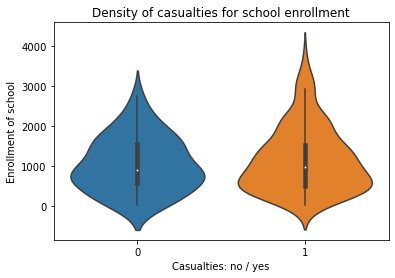

In [60]:
sns.violinplot(data=df3, x='casualties', y='enrollment')
plt.title("Density of casualties for school enrollment")
plt.xlabel('Casualties: no / yes')
plt.ylabel('Enrollment of school')

You can see that the highest number of enrollment for no casualties was around 3500 students. While when there were casualties, it went up to even schools from over 4000 students. However you can see that the median and the interquartile range are not that different. The density estimation (how wide the shape is) represent the higher probability of the given value: in this case around +/- 700/800 students.

This shows that there might be very small link between the enrollment the school, the resource officer and the casualties, but as this graph shows it's not that strong. <i> Therefore I want to include these variables in my prediction.</i>

I also want to check the relationship officer as the shooter and the resource of an officer compared to the difference in casualties. So let's continue with that.

______________________________________________________________________________________________________________________

##### 5. Officer being the shooter vs. casualties (and the resource of an officer at school)

Text(0, 0.5, 'casualties')

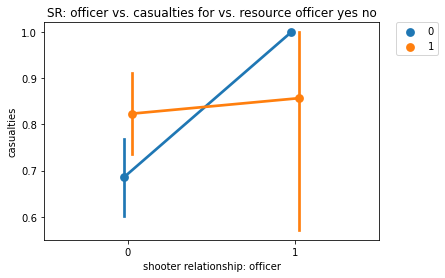

In [61]:
#dodge=true helps with reading the graph it will slightly shift the linkes to the left or right
sns.pointplot(data=df3, x='S_R_officer', y='casualties', hue='resource_officer', dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #moving the legend to the side otherwise it blocked the graph
plt.title("SR: officer vs. casualties for vs. resource officer yes no")
plt.xlabel('shooter relationship: officer')
plt.ylabel('casualties')

<b>How to analyze this point plot:</b><br>
The dots are the mean & the vertical lines are the distributions.</br>

<b>So let's first look at schools with the resource of an officer:</b><br>
There is a high distribution for shooter relationship = officer + school resource officer = yes. Also remarkable: if we compare the availability of an officer at school to shootings where the shooter isn't an officer the casualties are higher. When the shooter is an officer but the school didn't had a resource officer the casualties are higher. Aditionally when we look at the mean 

Thus we can conclude that of the shooterrelation ship is an officer, the resource of an officer would bring the amount of casualties down however the distribution of the relationship is much higher.</br>


______________________________________________________________________________________________________________________

##### 6. Casualties when the relationship of the shooter is a boyfriend


Text(6.799999999999997, 0.5, 'Shooter relationship: boyfriend')

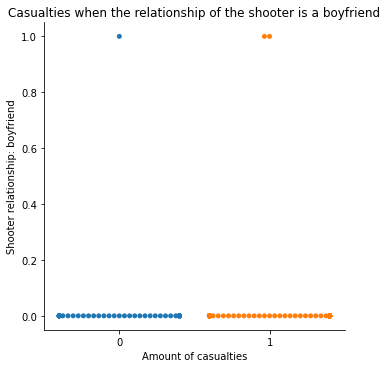

In [62]:
sns.catplot(x="casualties", y="S_R_boyfriend", kind="swarm", data=df3)
plt.title("Casualties when the relationship of the shooter is a boyfriend")
plt.xlabel('Amount of casualties')
plt.ylabel('Shooter relationship: boyfriend')

You can read this as for almost all occasions of casualties or non-casualties there was no boyfriend involved. However, when the shooter relationship is a boyfriend than then you get one dot with no casualties and 2 dots for casualties. This shows that 2 out of 3 shootings will be <b>with</b> casualties. So therefore these variables will show a strong correlation.

______________________________________________________________________________________________________________________


## 3.0 Predictive model

I tested both models, to see which suited best (as you can see when you scroll down). However I will start with showing the KNN model.

<b>Why KNN?</b><br>
K- Nearest Neighbors or also known as KNN is one of the simplest and strongest algorithms. It is mainly used for classification problems, which is the reason I will start with this prediciting model. In addition, it's easy of interpretation and has a low calculation time.</br>

<b>How does KNN work?</b><br>
KNN determines the value of a datapoint by the ones nearby. It's explained by majority voting: by setting the parameter to e.g. 5, the classes of the 5 most close datapoints are checked. It thus will be predicted according to the majority.</br>

______________________________________________________________________________________________________________________


### Training the algorithm

In the below cell, we separate the training and test data. This is a built-in function from sk-learn and it will split the data set randomly into a train set and a test set. The test_size is 0.3. Thhis means the data is split into 70% training data and 30% test data.

In [63]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df3[['resource_officer', 'enrollment','S_R_officer', 'S_R_boyfriend', 'S_type_accidental', 'S_R_student', 'S_R_parent', 'S_R_teacher']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df3['casualties'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

###  The process of trying out to change some variables

I did multipe trails of testing. I started with using the 4 variables that had the strongest correlation with casualties. 
To try and make the both the accuracy and precision better, I looked at which variables I could add. I started with looking at variables that were next on the list of a stronger correlation with casualties. 

I chose not to include the variable casualties_number, as this would make the prediction almost perfect (the dummy casualties is ofcourse extracted from casualties_number. The variable S_R_remaining also had a slightly'stronger correlation to casualties.

In the end after shifting between different variables and dummies I chose to add the following variables: S_R_student, S_R_parent, S_R_teacher, S_type_suicide. These were in line for the best correlation after the other variables I already included. But also because both S_R_parent and S_R_teacher had a strong correlation with S_R_student. 


______________________________________________________________________________________________________________________

### Classification with k-nearest neigbor (KNN)

Now I'll first import all the different object classes we need. Then I start with just setting the n_neighbors to 1, and see what the result is.

In [64]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=1) # Creates a KNN-classifier with X neighbors (default)
knn = knn.fit(X_train, y_train) # Fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) # Calculating the fit on the test data

0.625

The accuracy is 62. Which is not great but also doesn't tell the full story behind this prediction. So let's put this testing set in a matrix and check for more information.

______________________________________________________________________________________________________________________

### Evaluating the model

In [65]:
from sklearn.metrics import confusion_matrix

y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 7,  8],
       [13, 28]])

How do I know which row is which (casualties vs. non-casualties)? The atribute classes will show me this.

In [66]:
knn.classes_

array([0, 1])

So the left side of the column is non-casualties (0) and the right side of the column is casualties (1). It's important to also put this in the column the right way otherwise it will change the values and will mess up calculating the recal/ precision/ accuracy (manually).

In [67]:
conf_matrix = pd.DataFrame(cm, index=['non-casualties (actual)', 'casualties (actual)'], columns = ['non-casualties (predicted)', 'casualties (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,non-casualties (predicted),casualties (predicted)
non-casualties (actual),7,8
casualties (actual),13,28


The way to read this is that of the casualties 40 are correctly predicted as non-casualties. 12 non-casualties were predicted as non-casualties but were in fact casualties. And for those predicted to be casualties were 3 predicted correctly, while 1 casualties was predicted as casualties but were actually non-casualties.

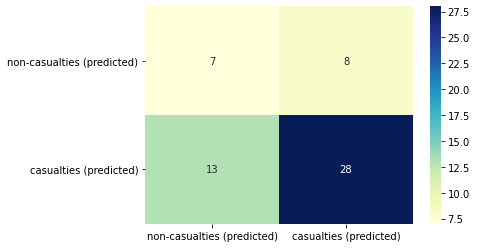

In [68]:
sns.heatmap(conf_matrix, xticklabels=conf_matrix.columns, yticklabels=conf_matrix.columns, cmap="YlGnBu", annot=True) #the last two arguments set the column names
plt.show()

Just to check, let's start with calculating the accuracy.

<b>ACCURACY</b><br>
$accuracy = \frac{7 + 28}{ 7 + 13 + 8 + 28} = 0.62$</br>


Indeed, accuracy is 62%: the same outcome as using the knn.score built in function.

______________________________________________________________________________________________________________________


<b>CASUALTIES</b>

<u>recall - casualties</u><br>
$recall = \frac{28}{ 13 + 28} = 0.68$</br>

<u>precision - casualties</u><br>
$precision = \frac{28 }{ 8 + 28} = 0.78$</br>


______________________________________________________________________________________________________________________


<b>NON-CASUALTIES</b>

<u>recall - non-casualties</u><br>
$recall = \frac{7 }{ 7 + 8} = 0.15$</br>

<u>precision - non-casualties</u><br>
$precision = \frac{7 }{ 7 + 20} = 0.25$</br>


#### What can we say about the recals and predictions of both casualties and precision?

For casualties the precision showed that 22% of casualties was predicted as casualties, but these turned out to be non-casualties. Tre recall of 68% for casualties shows that 68% of the casualties is being "catched" however 32% is still missed.

For casualties the predictions are very low. The precision is 25%. this means that a lot of non casualties that were predicted as non casualties were in fact casualties. The recall is very low, so we still miss 85% of all "cases".

Thus, we can conclude that these predictions are not good. It's not very precise in predicting, and still a lot of casualties and non-casualties are missed. We are mainly interested in the casualties, so it's good that these are a little better hower the recall of casualties needs to go up. And when the precision of non-casualties is so bad a lot of non-casualties will be casualties. And we actually need to catch these casualties accurately.
______________________________________________________________________________________________________________________

### Let's try to improve the model

I'll try to improve the model by looking at different parameters. One thing we can try is by changing the number of neighbors. We can use the built-in function classification_report in sklearn. This makes it easy (and quick) to print out the accuracy, precision, recall and support. I wanted to see how it would change over a larger range, so I only had to have 1 look into all the different neighbors.

<b>So just as a note to myself. Let's remind myself how to correctly read the results of a classification report!</b>

- <u>Precision</u>:<i> What percent of your predictions were correct?</i></br>
A definition would be: Precision is the ability of a classifier to not label an "predicted datapoint" positive that is actually negative. Easily said I can just ask myself the question: How precise am I in predicting casualties?

- <u>Recall</u>: <i>What percent of the positive casualties did you catch?</i></br>
A definition would be: Recall is the ability of a classifier to find all positive instances. So how many of these predictions would I recall/ how many did I catch?</br>

- <u>Score</u>: <i>What percent of positive predictions were correct?</i></br>
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. It is mainly used to compare classifier models.

- <u>Support</u>: <i>Support is the number of actual occurrences of the class in the specified dataset.</i></br>
Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models. Then what does it do: it diagnoses the evaluation process.but instead diagnoses the evaluation process.</br>

In [69]:
from sklearn.metrics import classification_report

for i in range(1,15):
    knn_new = KNeighborsClassifier(n_neighbors = i) # make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) # fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) # predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) # A built-in function to print out accuracy, precision and recall


With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40        15
           1       0.78      0.68      0.73        41

    accuracy                           0.62        56
   macro avg       0.56      0.57      0.56        56
weighted avg       0.66      0.62      0.64        56

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.31      0.53      0.39        15
           1       0.77      0.56      0.65        41

    accuracy                           0.55        56
   macro avg       0.54      0.55      0.52        56
weighted avg       0.64      0.55      0.58        56

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.77      0.98      0.86        41

    accuracy                           0.77        56
   macro avg       0.76      0.5

The scores seem broadly similar, but 3 or 4 neighbors seem to give the best result. However, with such a small dataset, it could well be coincidence. We don't know if could generalize this result.

Using a small value will provide the most flexible fit and a low bias, BUT a high variance which I note here as wel.

#### KNN 3 NEIGHBORS - What can we say?

For casualties it shows that 23% of the casualties was predicted as casualties, but these turned out to be non-casualties. Whe we look at the recall of 98% that's quite nice. So only 2% is being missed.

If we look at the precision for non-casualties 25% was predicted as non-casualties but turned out to be casualties. So not great, but will do. However, the recall is very low. We still miss 80%.

Though we could say the predictions are a bit better. In the discussion I will add the part for future considerations of making the prediction even better.
______________________________________________________________________________________________________________________

#### Let's try and visualize these results!

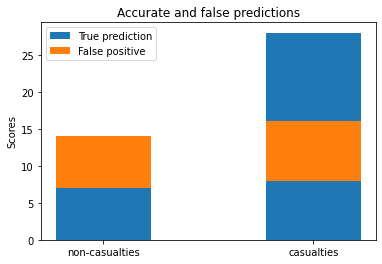

In [70]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
casualties = (13, 28)
non_casualties = (7, 8)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, casualties, width)
p2 = plt.bar(ind, non_casualties, width, bottom=non_casualties)

plt.ylabel('Scores')
plt.title('Accurate and false predictions')
plt.xticks(ind, ('non-casualties', 'casualties'))
plt.legend((p1[0], p2[0]), ('True prediction', 'False positive'))

plt.show()

By seeing the amount of red/orange values in graph, it shows that the prediction model still will need work. Unfortunately I couldn't get the stacked values of casualties separate (in the sense of first all of orange and then all of blue or the other way around).

______________________________________________________________________________________________________________________


### 3.5 Comparison with Random forest

Proin eget tortor risus. Nulla quis lorem ut libero malesuada feugiat. Nulla porttitor accumsan tincidunt. Proin eget tortor risus. Nulla quis lorem ut libero malesuada feugiat. Nulla porttitor accumsan tincidunt.
______________________________________________________________________________________________________________________


In [71]:
from sklearn.ensemble import RandomForestClassifier 

So I used the same set of variables to begin with, I used for the KNN prediction model.

In [72]:
X_new = df3[['resource_officer', 'enrollment','S_R_officer', 'S_R_boyfriend', 'S_type_accidental', 'S_R_student', 'S_R_parent', 'S_R_teacher', 'S_type_suicide']] #create the X matrix
X = normalize(X) #normalize the matrix (same scale)
y_new = df3['casualties'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1) #split the data, store it into different variables

### Training the algorithm

The random forest model is a built-in function from sk-learn. It uses randomness, so I need to set a random_state if we want the result to be stable for presentation purposes. The numbers of trees will be set to 100. Traditionally this was 10, but current literature suggest using more trees.

In [73]:
rf = RandomForestClassifier(random_state=1, max_features =5, n_estimators=100)
rf = rf.fit(X_train, y_train)

### Evaluating the model 

Let's evaluate the model. Easiest way to do this is by using the standard approach for a classification problem: making a confusion matrix. And after this we'll have a look at calculating the accuracy, precision and recall.

In [74]:
y_test_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 6,  9],
       [ 8, 33]])

Let's quickly check which values belong to the different sets of values.

In [75]:
knn.classes_

array([0, 1])

Let's evaluate the model using our standard approach for a classification problem: making a confusion matrix and calculating accuracy, precision and recall.

In [76]:
y_pred = rf.predict(X_test) #the predicted values
conf_matrix = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
conf_matrix = pd.DataFrame(cm, index=['casualties (actual)', 'non-casualties (actual)'], columns = ['casualties (predicted)', 'non-casualties (predicted)']) 
conf_matrix

,casualties (predicted),non-casualties (predicted)
casualties (actual),6,9
non-casualties (actual),8,33


The way to read this matrix is that 6 shootings that were predicted would have casualties, however from those shootings with casualties predicted, 8 shootings were in fact non casualties. When we look at non casualties, 33 were predicted to be non casualties and were indeed non-casualties. However also 9 were predicted to be non casualties and were in fact casualties.

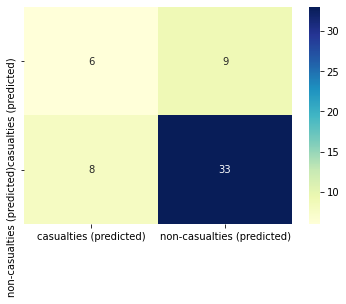

In [77]:
sns.heatmap(conf_matrix, xticklabels=conf_matrix.columns, yticklabels=conf_matrix.columns, cmap="YlGnBu", annot=True) #the last two arguments set the column names
plt.show()

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.40      0.41        15
           1       0.79      0.80      0.80        41

    accuracy                           0.70        56
   macro avg       0.61      0.60      0.60        56
weighted avg       0.69      0.70      0.69        56



So this classification report shows the following result:

The precision of non-casualties is not good. This means that 57% is seen as non casualties, but is in fact casualties. Then looking at the precision of casualties, it almost has the same result as the KNN model. It shows that the precision is for 21% off.

When looking at the recall, it's a better than the latest result of my KNN model. However still not good. This model is still missing 60% for non-casualties. For casualties it's 80% so 20% they didn't recall. A little lower than the KNN model.

The accurarcy as well: macro avg is 61% and the weighted avg is 69%. This is quite low.

### Conclusion

I tried to work with different parameter settings, but It didn't work. As our goal is to predict casualties I chose to stick with the KNN model. Both aren't really reliable, but here the results for detecting precisely and recalling the casualties variable are at it's best. 

______________________________________________________________________________________________________________________

# Discussion - Future work

When looking back at the proces of evaluating my prediction model, I made it hard for my self to choose a dataset with little entries. However I was able to at least evaluate and mess around with this data set in a sufficient way.

So coming back to my research question:
<i>"Given the relationship with the shooter, the school enrollment, whether the school had the resource of an officer and the shooting type how well can the casualties be predicted?"</i>

The answer to this question would be, not well (YET!). We want to be able to help schools and government with predictions in order to ofcourse learn and prevent any of these horrible school shootings. Therefore we wanted to predict the casualties. The predicted casualties for my best model was by using the KNN model and using 3 neighbors. It gave me an accuracy of 76% a precision of 77% and a recall of 98%. However this is always in relation to prediction the non-casualties. The non-casualties had a very low recall, which made the predictions even less trustworthy. 

Most remarkable finding of this research, was based on the analysis of the relationship between shootings and the resource to an officer + the shooter who was an officer. First I thought that it might had something to do with the enrollment, and that therefore the probability of having the involvement could be higher but this didn't show in the results.

After the presentation my intention was to go back and see if it would make a difference when I would subset my dataset differently by adding different variables. However, I got some errors in the process. Due to limitations in time (1 afternoon) I didn't had the time to fix it and in order to make it work I decided to leave it like this and include it in a section for future work.

So things I would look into in further research, was thus trying to subset the dataframe differently. I would want to have a look into variables as: day of the week, school type and low_grade, high_grade. As mentioned before I think ethnicities of the schools might have been variables of value, however at the beginning of this project I wanted to try and leave them out as the feeling of scoring on race didn't feel like a very ethical thing to do.

I was able to look into including dummies for day of the week. This way I could quickly look into the correlation.

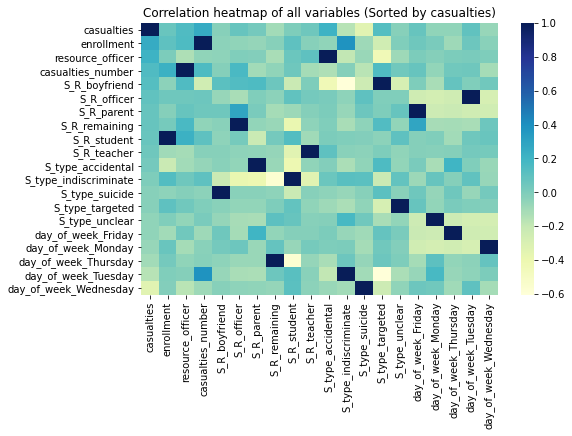

The correlation showed me some stronger correlations, but not in relation to the y-variable casualties. Unfortunately didn't had the time to look into it any further.

Just ending my discussion by thinking out loud: I use a lot of dummy variables. I ended up reading tonight about the dummy variable trap, though I could only find a connection so far to regression model. I wonder if this could have had an effect on my predictions as well. Something to look into thus.

______________________________________________________________________________________________________________________

# References

Analysis | More than 240,000 students have experienced gun violence at school since Columbine. (2018, April 20). Washington Post. https://www.washingtonpost.com/graphics/2018/local/school-shootings-database/


W. Rich, Data-School-Shootings, (2019), GitHub repository, https://github.com/washingtonpost/data-school-shootings